In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# Generating data in the from 
- y = 1 + 2x1 + 3x2 + epsilon
- where -10 ≤ x1 ≤ 10 and -10 ≤ x2 ≤ 10
- where epsilon represents the 'irreducible error' 


In [5]:
nums_point = 100
x = np.random.uniform(-0.33,0.33,nums_point)
epsilon = np.random.randn(nums_point)

y = 1+3*x+epsilon

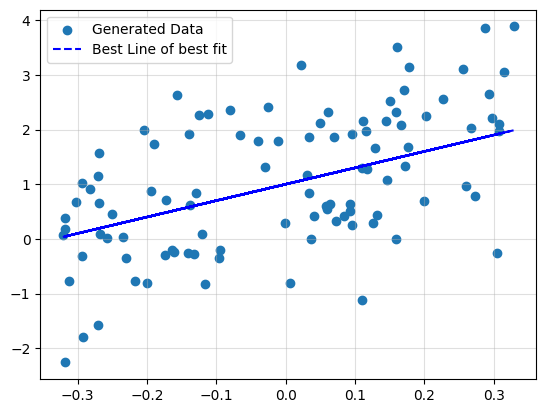

In [6]:
plt.scatter(x,y,label='Generated Data')
plt.plot(x,y-epsilon,'b--',label='Best Line of best fit')
plt.grid(alpha=0.4)
plt.legend()

# Fitting the line of best fit 
1. starting with the closed form minimized solution of the linear regression
2. followed by the LR implementation of sklearn

In [7]:
(x-x.mean())*(y-y.mean())

array([ 0.38853579, -0.23515116, -0.05902585,  0.11419292,  0.48427968,
        0.1184854 ,  0.21150313, -0.14130034,  0.20602953,  0.10753922,
       -0.07392526,  0.08823763,  0.026493  ,  0.35233681,  0.06465231,
        0.1970163 ,  0.16447938,  0.35611753, -0.08245568,  0.20400002,
       -0.40891525,  0.30625465, -0.07556418, -0.1270653 ,  0.54299655,
        0.0543924 ,  0.13179941,  0.26837964,  0.06369094,  0.3920422 ,
        0.16910796, -0.02969176,  0.08523061,  0.29292606, -0.04239481,
        1.02457993,  0.23419288,  0.22768169,  0.12234738, -0.03103022,
        0.95630213,  0.33353034, -0.04890969,  0.25467766, -0.03379184,
       -0.17417201,  0.41727488,  0.19541629, -0.09401703,  0.55120421,
        0.35521392, -0.0470352 , -0.05797656, -0.2583992 ,  0.05067623,
        0.29889555,  0.02774876, -0.18470351,  0.10618084,  0.38094621,
       -0.00580562, -0.02198578,  0.68763244,  0.00295769,  0.64622052,
        0.1022772 , -0.02788252,  0.14545671, -0.11422906,  0.26

In [8]:
beta_1 = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
beta_0 = np.mean(y) - beta_1*np.mean(x)

In [9]:
beta_1.item(),beta_0.item()

(3.600901973571212, 1.0799378689345367)

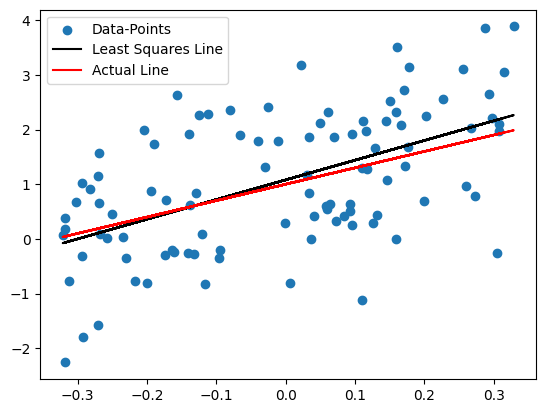

In [10]:
plt.scatter(x,y,label='Data-Points')
plt.plot(x,beta_0+beta_1*x,label='Least Squares Line',color='black')
plt.plot(x,1+3*x,label='Actual Line',color='red')
plt.legend()

In [11]:
slopes = []
intercepts = []

for _ in range(10000):
    x = np.random.uniform(-0.33, 0.33, nums_point)
    y = 1 + 3 * x + np.random.randn(nums_point)

    beta_1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)

    slopes.append(beta_1)
    intercepts.append(beta_0)

print(np.mean(slopes), np.mean(intercepts))  

2.999933264611447 1.000813104546021


# Confidence Intervals for the predicted \beta0 and \beta1


In [12]:
ci = 0.95
beta0_se = x.std()**2*(1/len(x) + x.mean()**2/np.sum((x-x.mean())**2))
beta1_se = x.std()**2/np.sum((x-x.mean())**2)

In [13]:
beta0_interval = (beta_0-2*beta0_se,beta_0+2*beta0_se)
beta1_interval = (beta_1-2*beta1_se,beta_1+2*beta1_se)

In [14]:
beta0_interval,beta1_interval

((np.float64(1.0881207336044167), np.float64(1.0893959372090016)),
 (np.float64(2.8724130906918472), np.float64(2.9124130906918473)))